<a href="https://colab.research.google.com/github/Saul-Ochoa/Classification-ML/blob/main/Bank%20Customer%20Churn%20Prediction/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Prediction**

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
import plotly.express as px
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
train='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Bank%20Customer%20Churn%20Prediction/train.csv'
test='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Bank%20Customer%20Churn%20Prediction/test.csv'
sample_submision='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Bank%20Customer%20Churn%20Prediction/sample_submission.csv'
data='https://raw.githubusercontent.com/Saul-Ochoa/Classification-ML/main/Bank%20Customer%20Churn%20Prediction/Churn_Modelling.csv'

In [3]:
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')
sample_submision=pd.read_csv(sample_submision,sep=',')
data=pd.read_csv(data,sep=',')

In [4]:
train.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
train.describe().T.style.background_gradient()

In [7]:
test.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [9]:
test.describe().T.style.background_gradient()

In [10]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
data.describe().T.style.background_gradient()

In [13]:
sample_submision.head()

id  Exited
0  165034     0.5
1  165035     0.5
2  165036     0.5
3  165037     0.5
4  165038     0.5

## **Exploratory Data Analytics**

**Train null values**

In [14]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

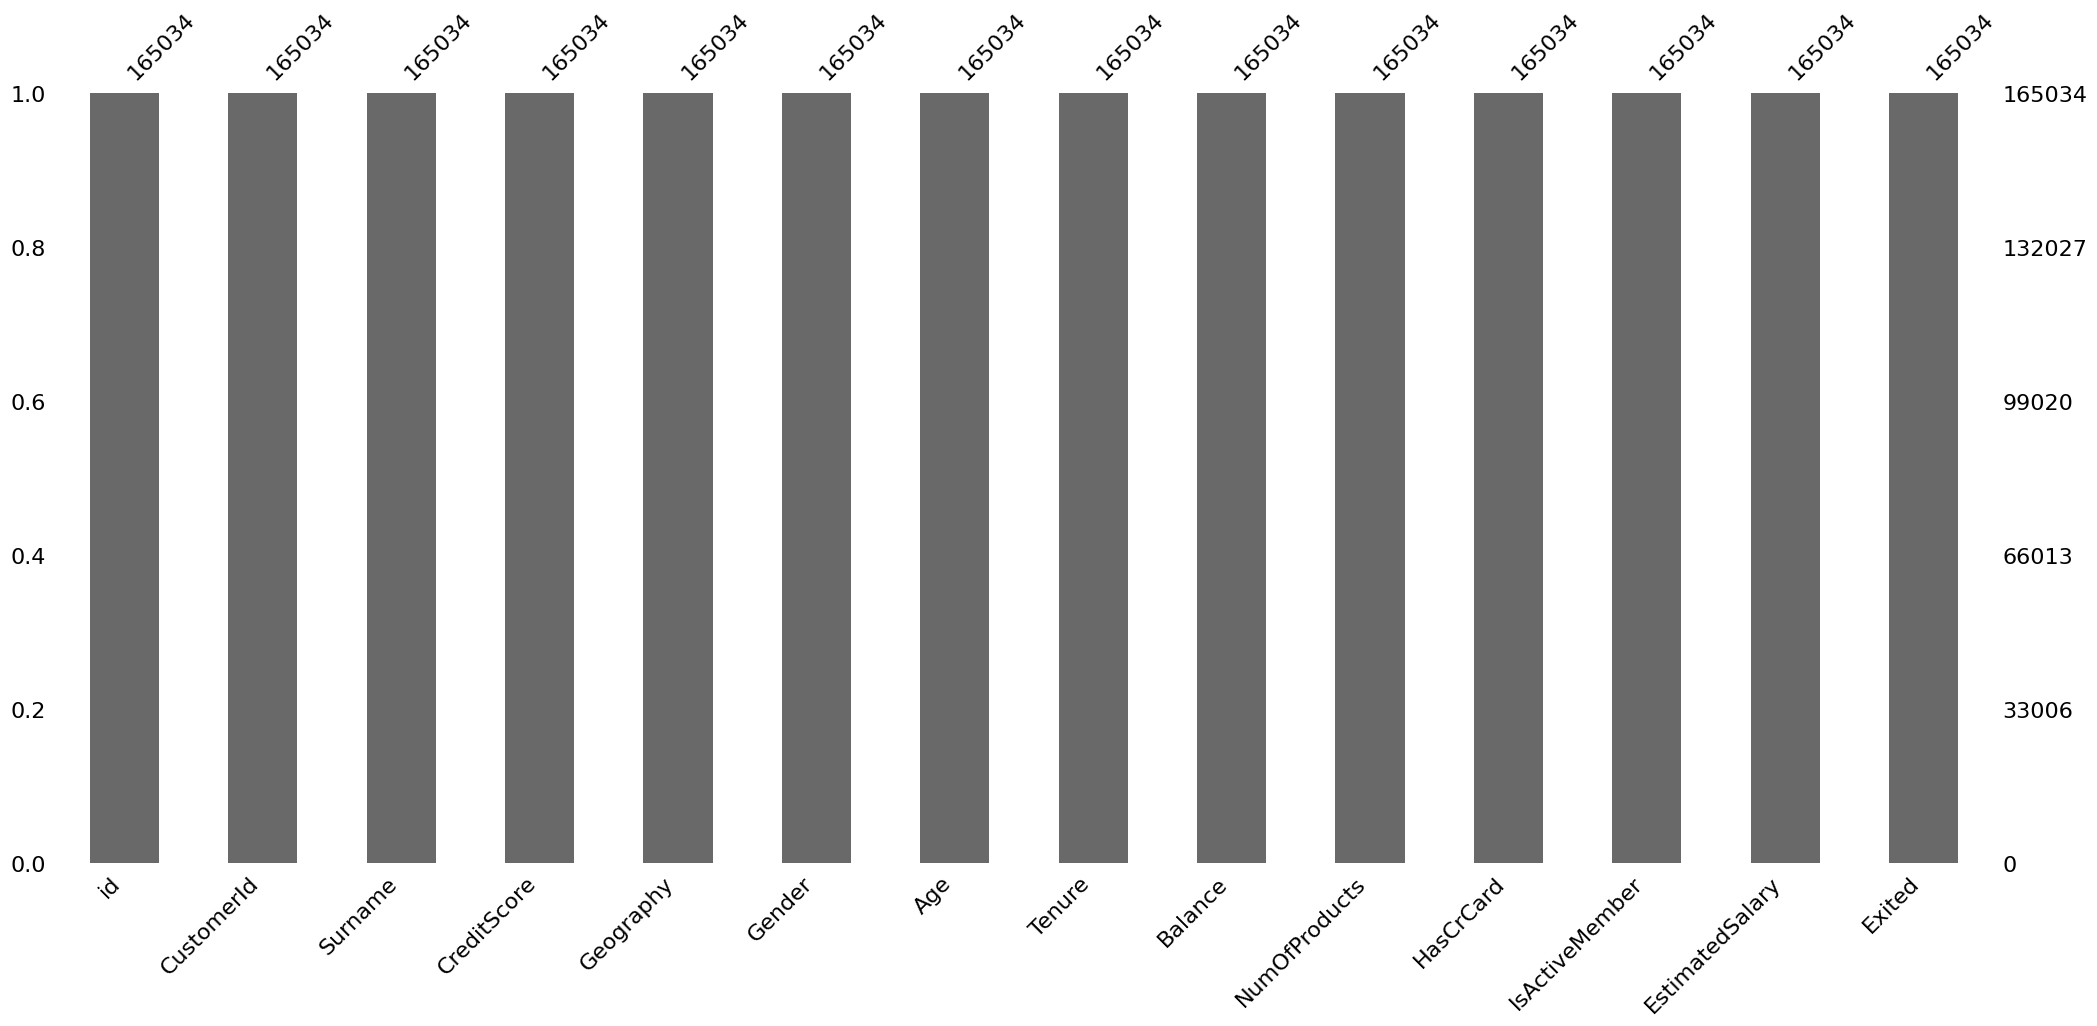

In [15]:
msno.bar(train)

**Test null values**

In [16]:
test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

<Axes: >

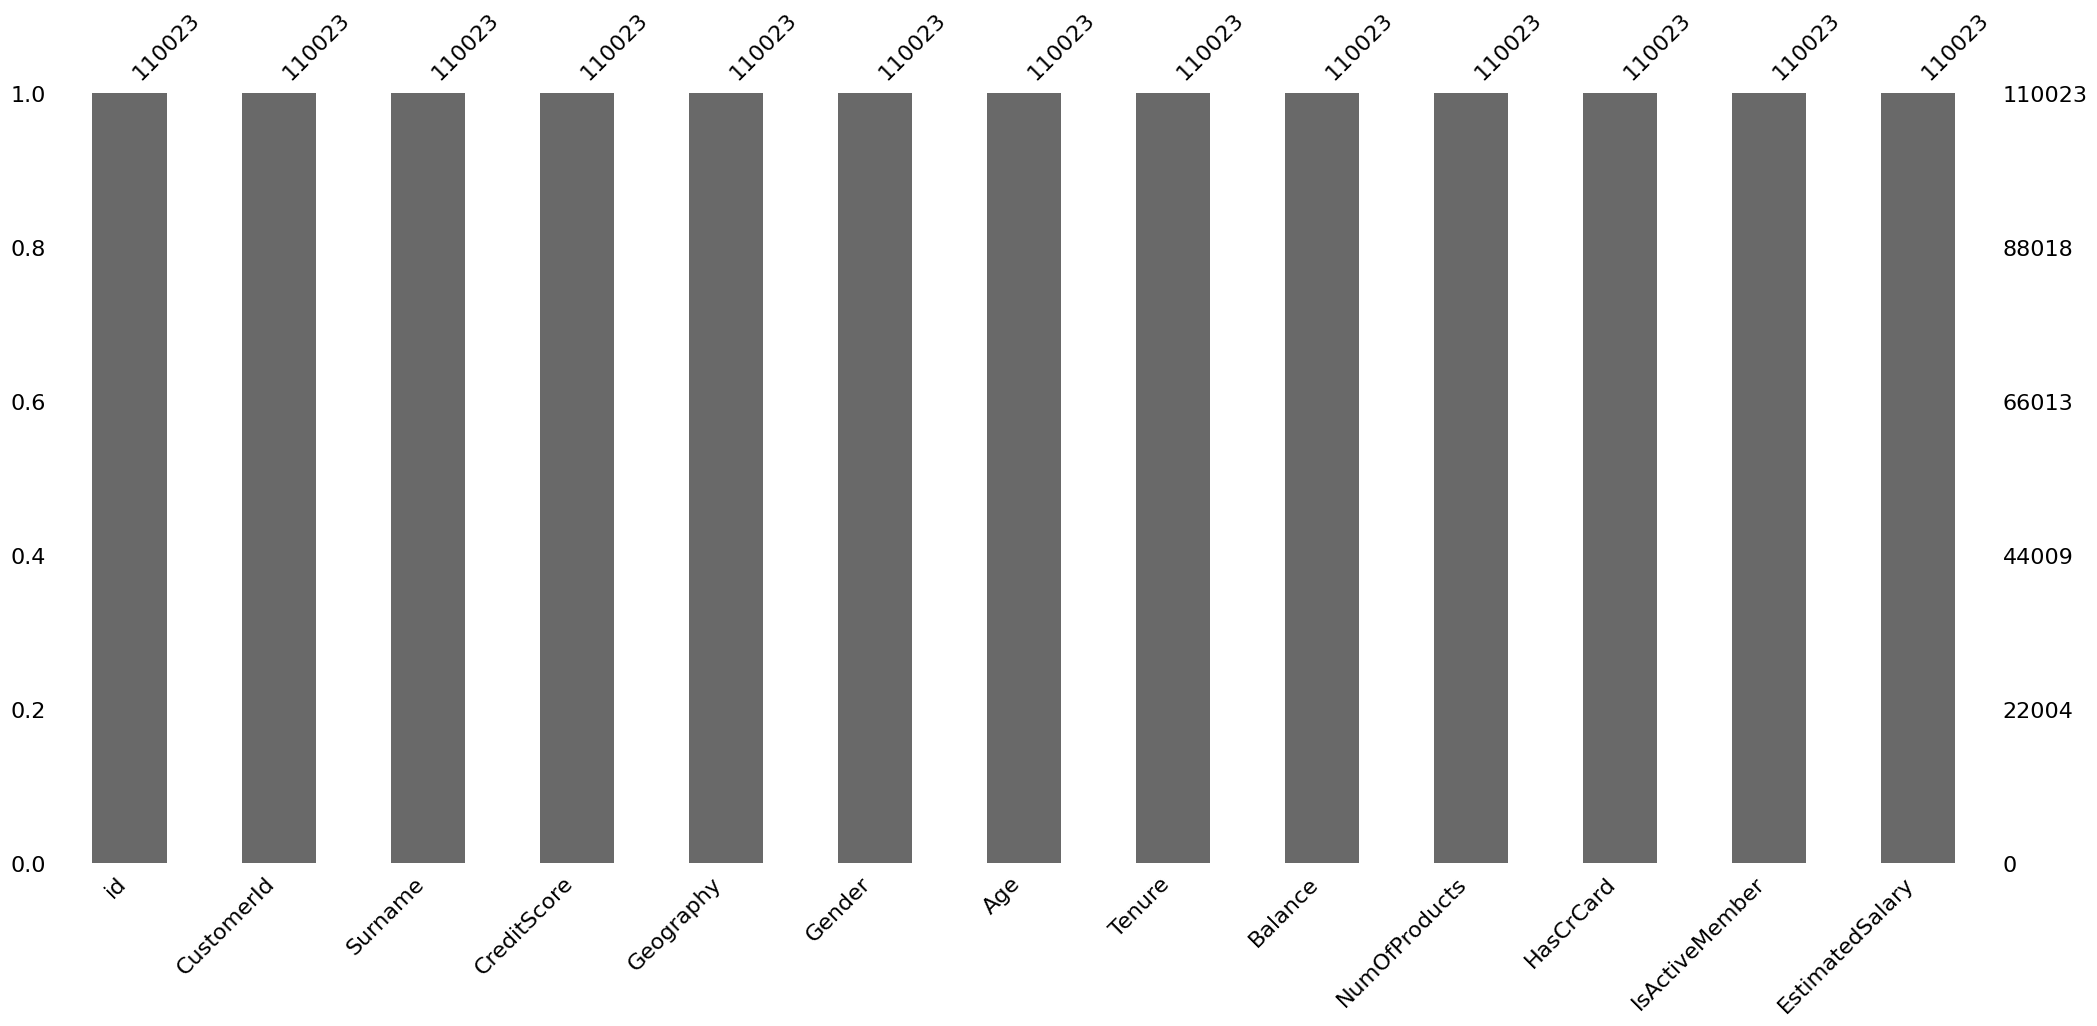

In [17]:
msno.bar(test)

**Tarjet Variable Analysis**

In [18]:
train.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [19]:
def target_values(train,titulo):
  f,ax=plt.subplots(1,2,figsize=(19,8))
  train['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
  # ax[0].set_title('Pie-Plot')
  ax[0].set_ylabel('')
  sns.countplot(x='Exited',data=train,ax=ax[1])
  # ax[1].set_title('Count-Plot')
  plt.suptitle(f'Target Value Anaysis - {titulo}')
  plt.show()
def target_values_px(train,titulo):
    # Pie chart
    pie_data = train['Exited'].value_counts()
    fig_pie = px.pie(pie_data, values=pie_data.values, names=pie_data.index,
                     title='Pie-Chart', hole=0.2)

    # Bar chart
    bar_data = train['Exited'].value_counts().reset_index()
    fig_bar = px.bar(bar_data, x='index', y='Exited', color='index',
                     title='Bar-Chart', labels={'index': 'Exited', 'Exited': 'Count'})

    # Display charts side by side
    fig_pie.update_layout(showlegend=True, legend=dict(x=0.5, y=1.15, orientation="h"),
                          title=f'Target Value Analysis - {titulo} - Pie Chart')
    fig_bar.update_layout(showlegend=True, legend=dict(x=0.5, y=1.15, orientation="h"),
                          title=f'Target Value Analysis - {titulo} - Bar Chart')

    # Show charts side by side
    fig_pie.show()
    fig_bar.show()

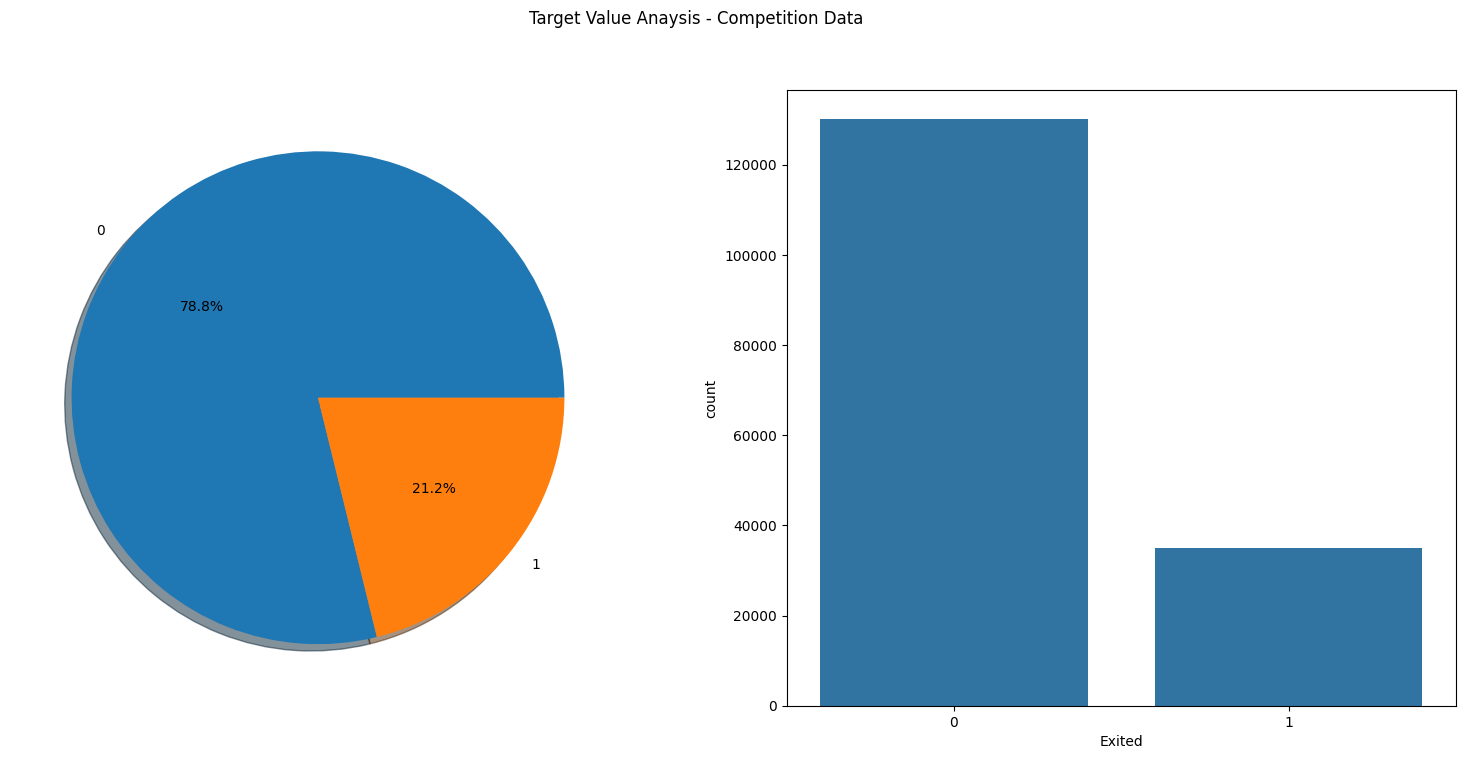

In [20]:
target_values(train,'Competition Data')

In [21]:
target_values_px(train,'Competition Data')

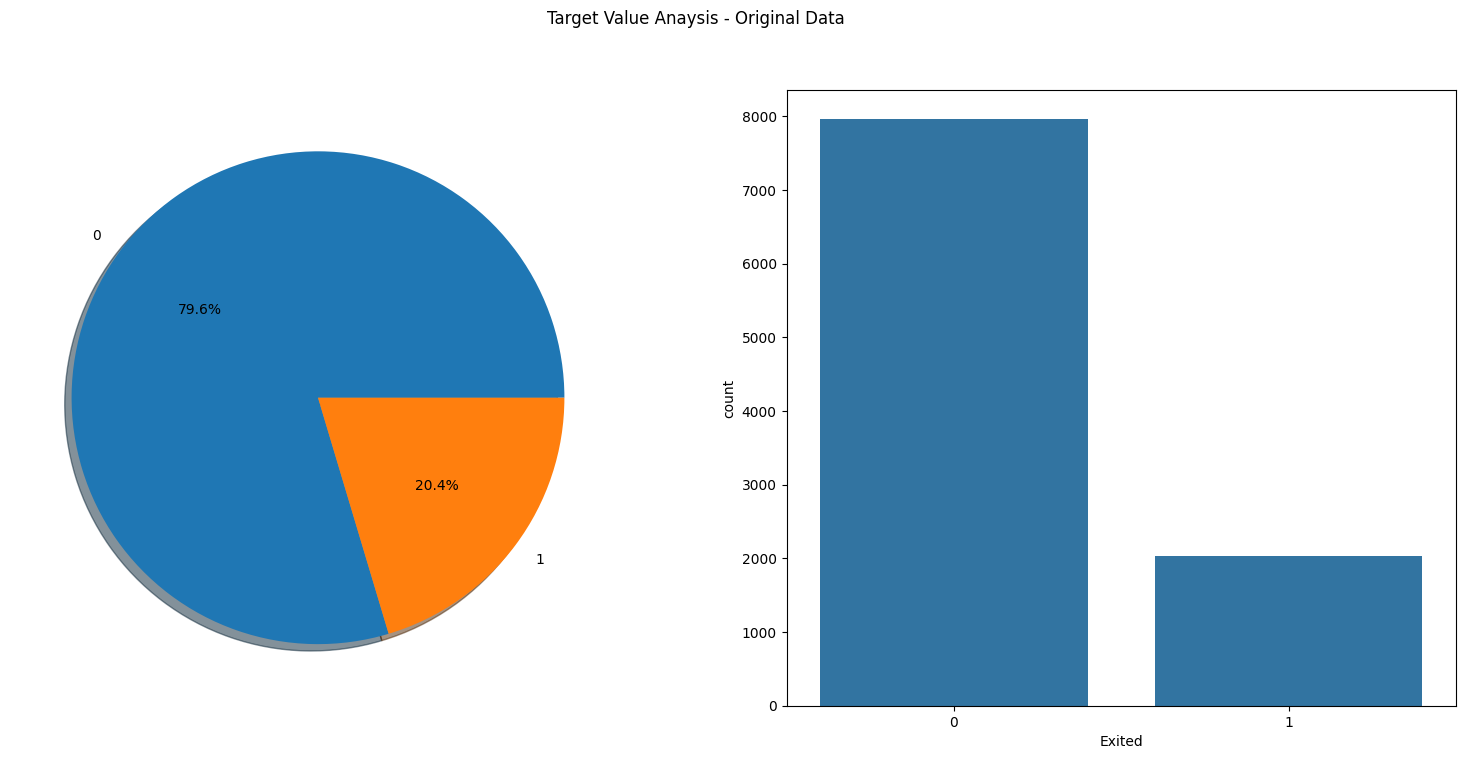

In [22]:
target_values(data,'Original Data')

In [23]:
target_values_px(data,'Original Data')

In [24]:
cat=train.select_dtypes(include='object').columns
cat=['Geography', 'Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

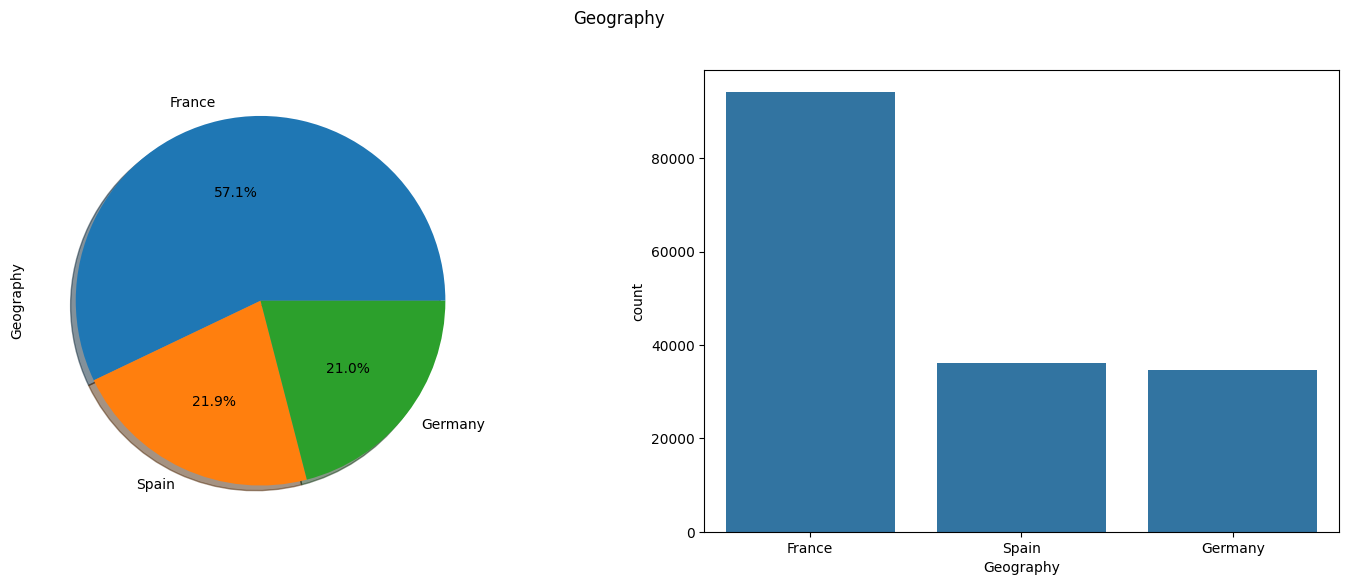

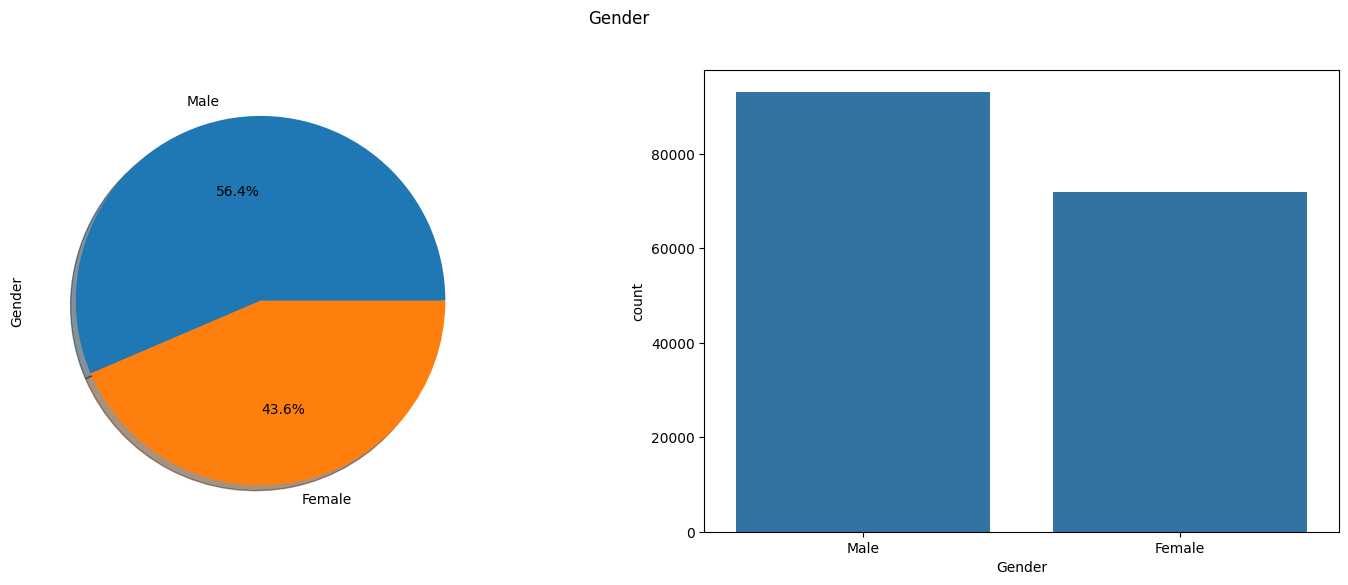

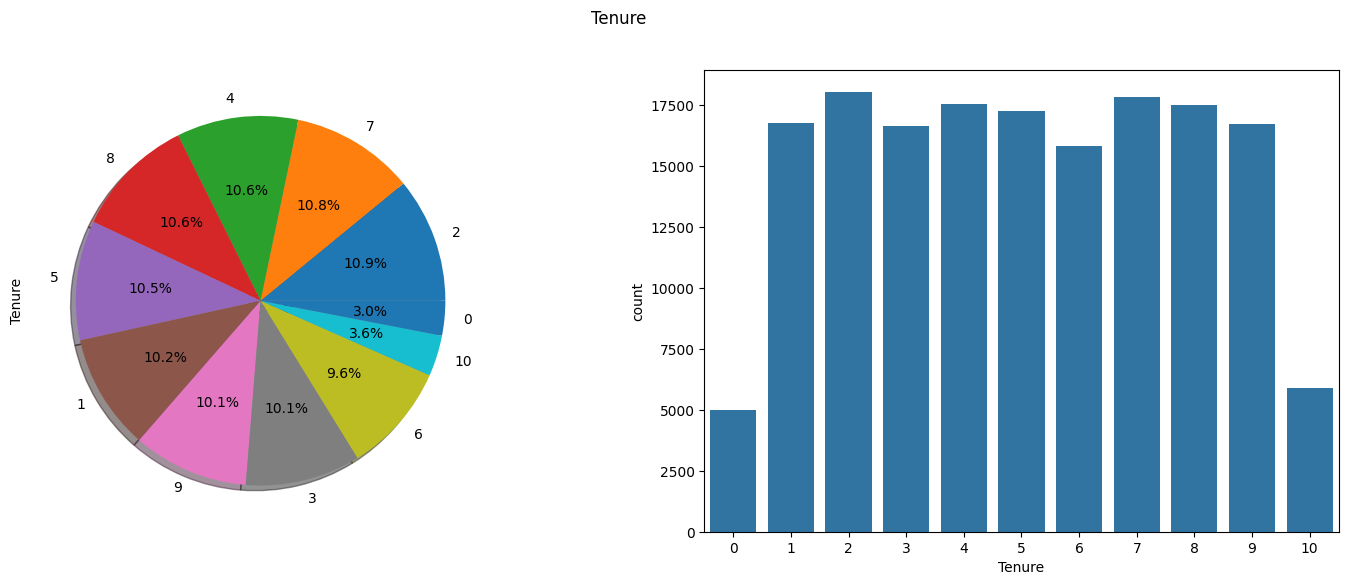

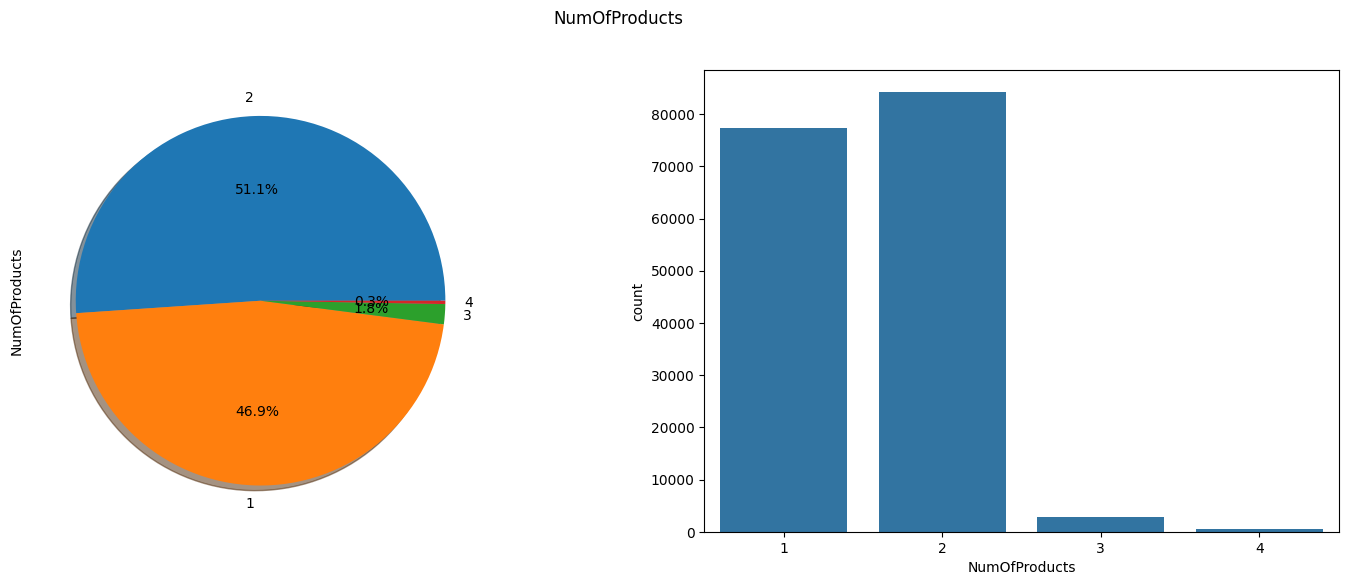

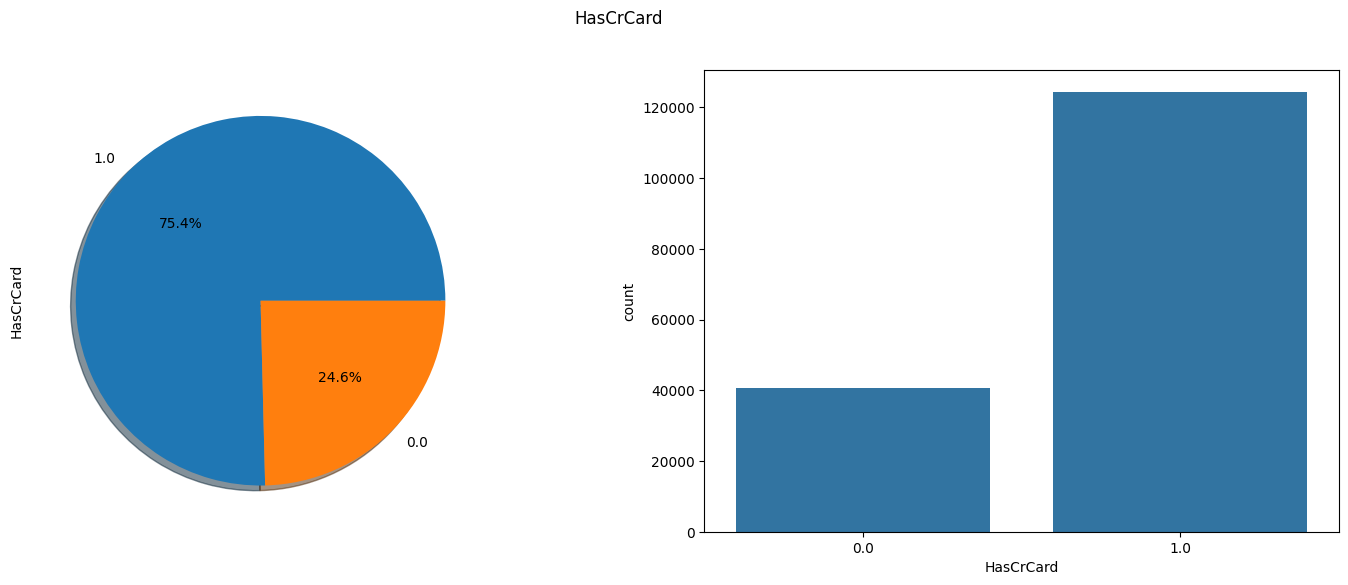

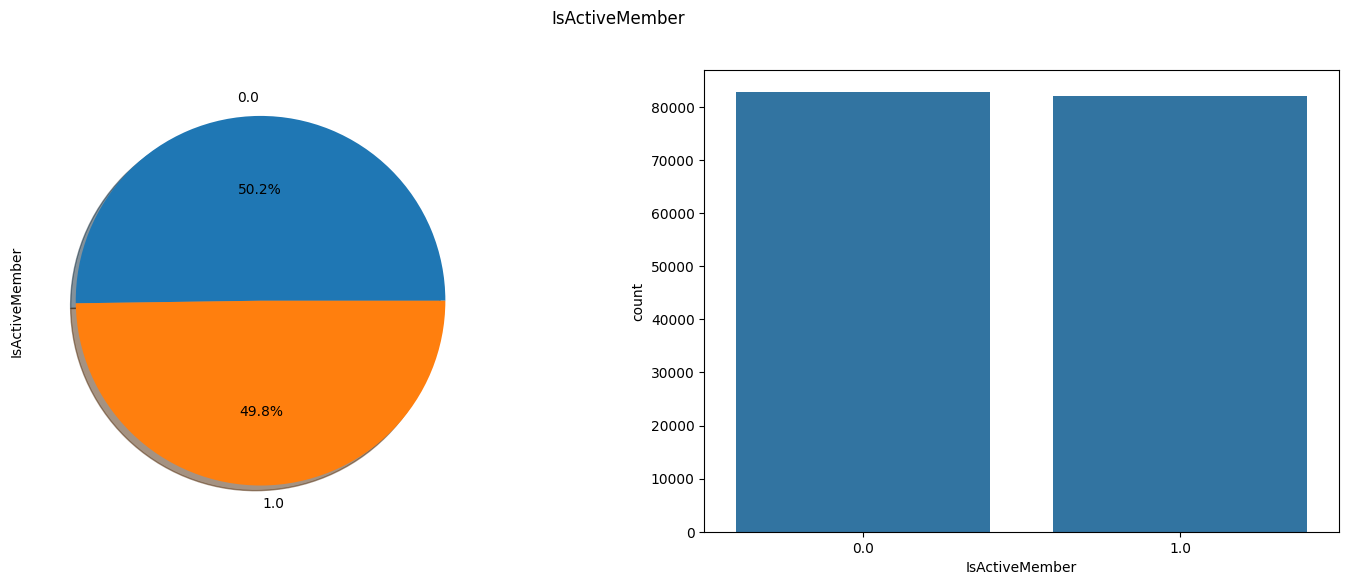

In [25]:
for i in cat:
  f,ax=plt.subplots(1,2,figsize=(18,6))
  train[i].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
  ax[0].set_ylabel(f'{i}')
  sns.countplot(x=i,data=train,ax=ax[1])
  plt.suptitle(f'{i}')
  plt.show()


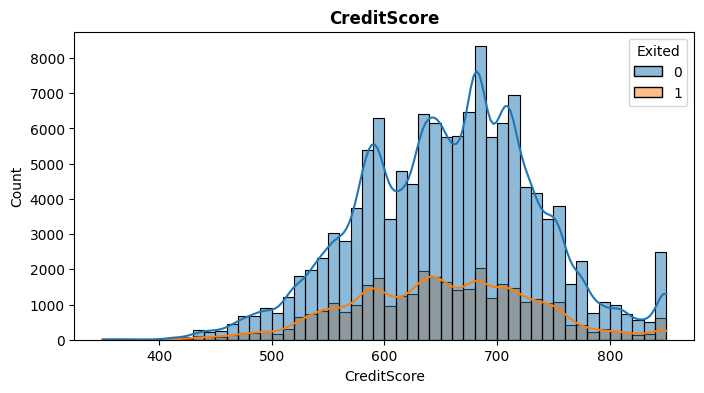

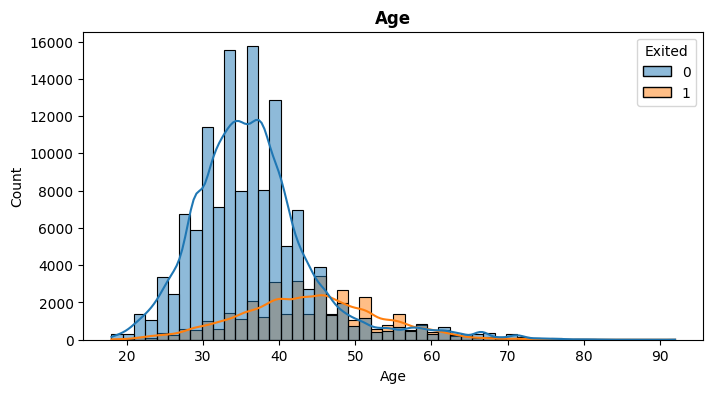

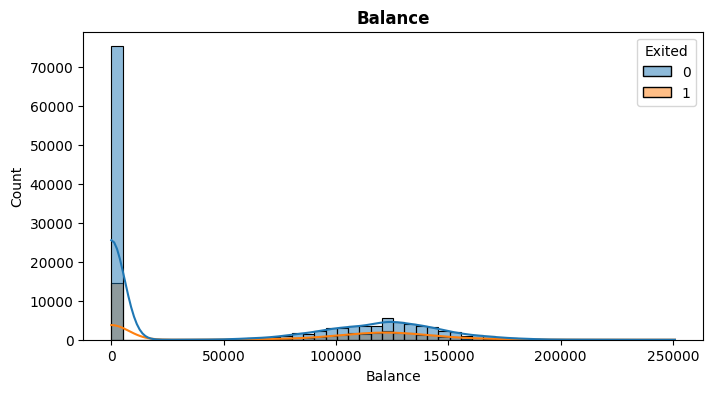

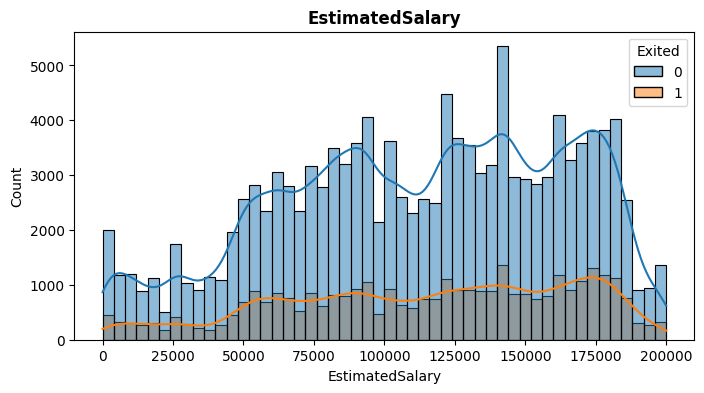

In [26]:
num=train.select_dtypes(include='number').columns
num=['CreditScore', 'Age','Balance','EstimatedSalary']
for i in num:
  fig,ax=plt.subplots(figsize=(8,4))
  fig=sns.histplot(data=train,x=i,hue='Exited',bins=50,kde=True)
  plt.title(i,fontsize=12,weight='bold')
  plt.show()

In [27]:
train_1=train[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']]
train_1.head()

CreditScore   Age    Balance  EstimatedSalary  Exited
0          668  33.0       0.00        181449.97       0
1          627  33.0       0.00         49503.50       0
2          678  40.0       0.00        184866.69       0
3          581  34.0  148882.54         84560.88       0
4          716  33.0       0.00         15068.83       0

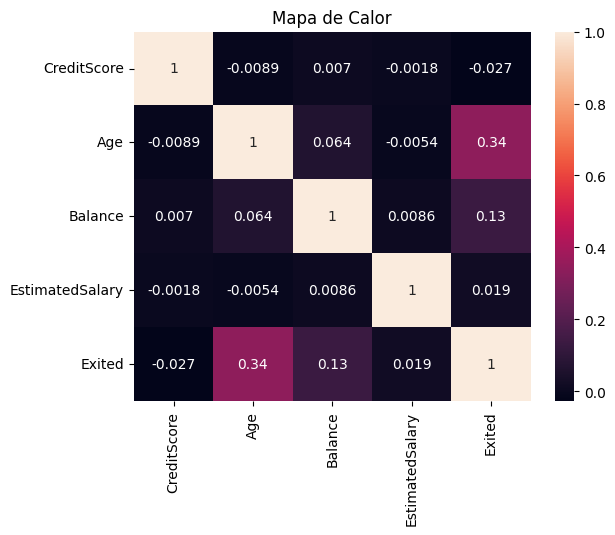

In [28]:
sns.heatmap(train_1.corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

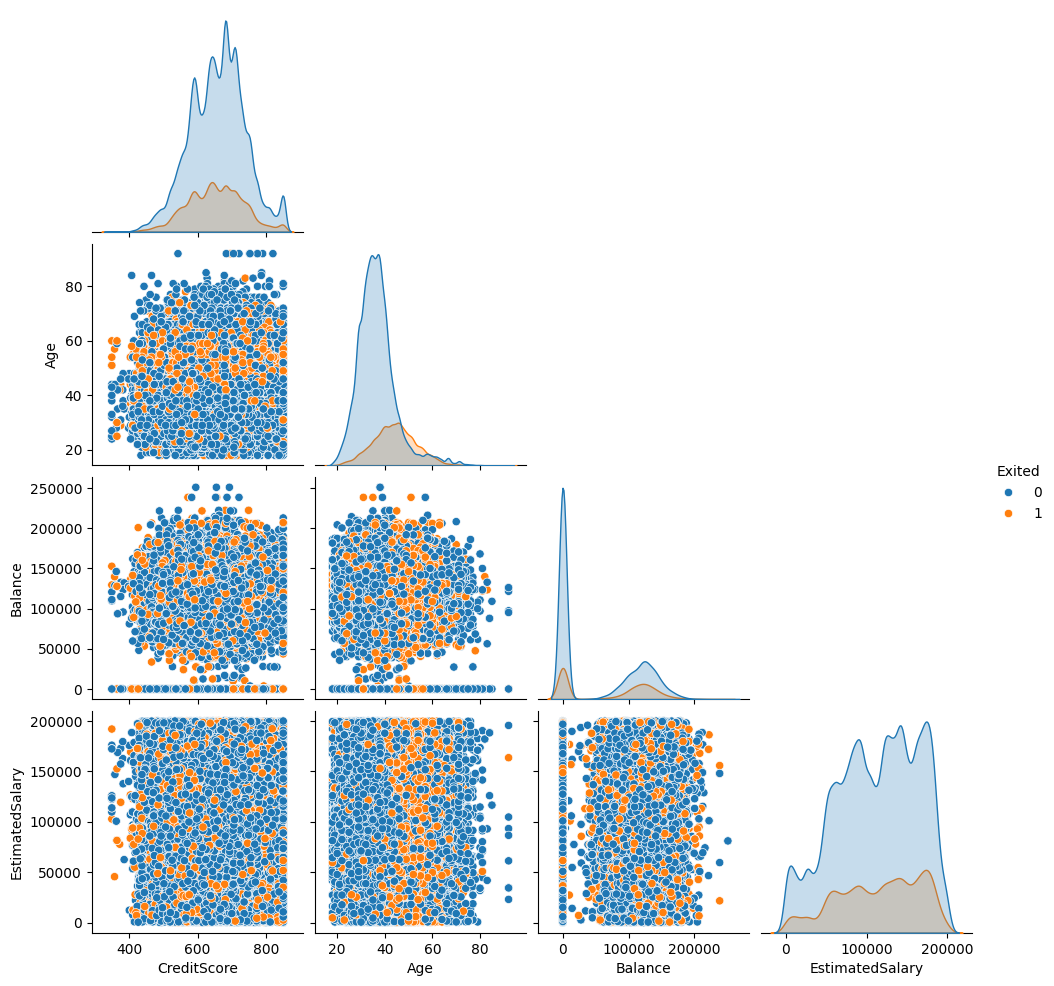

In [29]:
sns.pairplot(data=train_1,hue='Exited',corner=True)
plt.show()

In [30]:
# Gráfico similar a sns.pairplot con plotly.express
feature_names=['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
fig = px.scatter_matrix(train_1, dimensions=feature_names, color="Exited",
                        title="Pairplot with Plotly Express", height=800, width=800)
fig.update_traces(marker=dict(size=5))
fig.show()

## **Machine Learning XGBOOST**

In [31]:
X=train.drop(['id', 'CustomerId', 'Surname', 'Exited'],axis=1)
y=train['Exited']

**Encoding Caegorical Variables:**

In [32]:
X.head()

CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       0.00              2   
1          627    France   Male  33.0       1       0.00              2   
2          678    France   Male  40.0      10       0.00              2   
3          581    France   Male  34.0       2  148882.54              1   
4          716     Spain   Male  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  
0        1.0             0.0        181449.97  
1        1.0             1.0         49503.50  
2        1.0             0.0        184866.69  
3        1.0             1.0         84560.88  
4        1.0             1.0         15068.83

In [33]:
X_encoded = pd.get_dummies(X, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])
X_encoded.head()

CreditScore   Age  Tenure    Balance  EstimatedSalary  Geography_France  \
0          668  33.0       3       0.00        181449.97                 1   
1          627  33.0       1       0.00         49503.50                 1   
2          678  40.0      10       0.00        184866.69                 1   
3          581  34.0       2  148882.54         84560.88                 1   
4          716  33.0       5       0.00         15068.83                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
0                  0                0              0            1   
1                  0                0              0            1   
2                  0                0              0            1   
3                  0                0              0            1   
4                  0                1              0            1   

   IsActiveMember_0.0  IsActiveMember_1.0  HasCrCard_0.0  HasCrCard_1.0  \
0                   1                   0              0              1   
1                   0                   1              0              1   
2                   1                   0              0              1   
3                   0                   1              0              1   
4                   0                   1              0              1   

   NumOfProducts_1  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  
0                0                1                0                0  
1                0                1                0                0  
2                0                1                0                0  
3                1                0                0                0  
4                0                1                0                0

In [34]:
test=test.drop(['id', 'CustomerId', 'Surname'],axis=1)
test.head()
X_test_encoded = pd.get_dummies(test, columns=['Geography',
                                       'Gender',
                                       'IsActiveMember',
                                       'HasCrCard',
                                       'NumOfProducts'])

X_test_encoded.head()

CreditScore   Age  Tenure    Balance  EstimatedSalary  Geography_France  \
0          586  23.0       2       0.00        160976.75                 1   
1          683  46.0       2       0.00         72549.27                 1   
2          656  34.0       7       0.00        138882.09                 1   
3          681  36.0       8       0.00        113931.57                 1   
4          752  38.0      10  121263.62        139431.00                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
0                  0                0              1            0   
1                  0                0              1            0   
2                  0                0              1            0   
3                  0                0              0            1   
4                  1                0              0            1   

   IsActiveMember_0.0  IsActiveMember_1.0  HasCrCard_0.0  HasCrCard_1.0  \
0                   0                   1              1              0   
1                   1                   0              0              1   
2                   1                   0              0              1   
3                   1                   0              0              1   
4                   1                   0              0              1   

   NumOfProducts_1  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  
0                0                1                0                0  
1                1                0                0                0  
2                0                1                0                0  
3                1                0                0                0  
4                1                0                0                0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [36]:
# Use binary logistic
xgb_v1=xgb.XGBClassifier(objective='binary:logistic',seed=42)
xgb_v1.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.87456
[1]	validation_0-auc:0.88092
[2]	validation_0-auc:0.88303
[3]	validation_0-auc:0.88468
[4]	validation_0-auc:0.88556
[5]	validation_0-auc:0.88591
[6]	validation_0-auc:0.88628
[7]	validation_0-auc:0.88674
[8]	validation_0-auc:0.88708
[9]	validation_0-auc:0.88711
[10]	validation_0-auc:0.88730
[11]	validation_0-auc:0.88754
[12]	validation_0-auc:0.88765
[13]	validation_0-auc:0.88772
[14]	validation_0-auc:0.88782
[15]	validation_0-auc:0.88793
[16]	validation_0-auc:0.88806
[17]	validation_0-auc:0.88805
[18]	validation_0-auc:0.88794
[19]	validation_0-auc:0.88796
[20]	validation_0-auc:0.88807
[21]	validation_0-auc:0.88815
[22]	validation_0-auc:0.88811
[23]	validation_0-auc:0.88816
[24]	validation_0-auc:0.88814
[25]	validation_0-auc:0.88807
[26]	validation_0-auc:0.88806
[27]	validation_0-auc:0.88796
[28]	validation_0-auc:0.88798
[29]	validation_0-auc:0.88798
[30]	validation_0-auc:0.88799
[31]	validation_0-auc:0.88798
[32]	validation_0-auc:0.88797


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
prediction_xgb=xgb_v1.predict(X_test)
cm=confusion_matrix(y_test,prediction_xgb)
print(cm)

[[30881  1648]
 [ 3926  4804]]


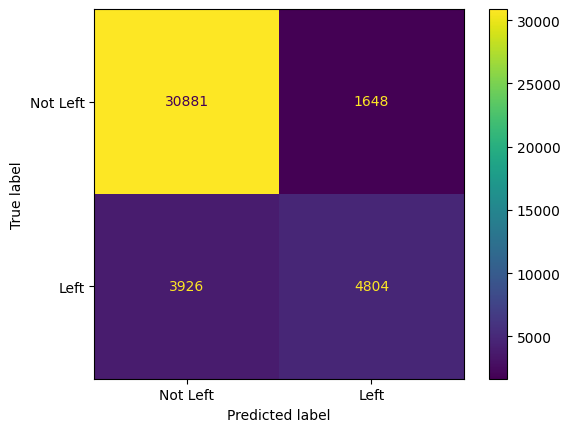

In [38]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Left','Left'])
disp.plot()
plt.show()

In [39]:
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32529
           1       0.74      0.55      0.63      8730

    accuracy                           0.86     41259
   macro avg       0.82      0.75      0.78     41259
weighted avg       0.86      0.86      0.86     41259



## **Hyperparameter Tuning and Cross-Validation:**

1. max_depth: The maximum depth of a tree.

2. learning_rate: Same as the learning rate in CNNs.

3. gamma: A node is split only when the resulting split gives a positive reduction in the loss function.

4. reg_lambda: L2 regularization term on weights (analogous to Ridge regression).

5. scale_pos_weight: It controls the balance of positive and negative weights, It is useful for imbalanced classes. A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

In [43]:
xgb_v2=xgb.XGBClassifier(objective='binary:logistic',seed=42)
param_grid = {
     'max_depth': [3, 4, 5],
     'learning_rate': [0.05, 0.01, 0.1],
     'gamma': [0, 0.25, 1.0],
     'reg_lambda': [0, 1.0, 10.0],
     'scale_pos_weight': [1, 3, 5]
 }
#hiperparametros
grid_search=GridSearchCV(xgb_v2,param_grid,cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]})

In [53]:
# Almacena los mejores parámetros en una variable
mejores_parametros = grid_search.best_params_
print(mejores_parametros)
# Crea el modelo XGBClassifier utilizando los mejores parámetros
xgb_v2 = xgb.XGBClassifier(**mejores_parametros)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 1.0, 'scale_pos_weight': 1}


In [54]:
xgb_v2.fit(X_train,
               y_train,
               verbose=True,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.86804
[1]	validation_0-auc:0.87088
[2]	validation_0-auc:0.87283
[3]	validation_0-auc:0.87405
[4]	validation_0-auc:0.87572
[5]	validation_0-auc:0.87655
[6]	validation_0-auc:0.87752
[7]	validation_0-auc:0.87885
[8]	validation_0-auc:0.88121
[9]	validation_0-auc:0.88190
[10]	validation_0-auc:0.88260
[11]	validation_0-auc:0.88276
[12]	validation_0-auc:0.88351
[13]	validation_0-auc:0.88378
[14]	validation_0-auc:0.88397
[15]	validation_0-auc:0.88411
[16]	validation_0-auc:0.88446
[17]	validation_0-auc:0.88490
[18]	validation_0-auc:0.88517
[19]	validation_0-auc:0.88538
[20]	validation_0-auc:0.88560
[21]	validation_0-auc:0.88567
[22]	validation_0-auc:0.88585
[23]	validation_0-auc:0.88617
[24]	validation_0-auc:0.88636
[25]	validation_0-auc:0.88649
[26]	validation_0-auc:0.88661
[27]	validation_0-auc:0.88671
[28]	validation_0-auc:0.88682
[29]	validation_0-auc:0.88692
[30]	validation_0-auc:0.88706
[31]	validation_0-auc:0.88714
[32]	validation_0-auc:0.88728
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
prediction_xgb=xgb_v2.predict(X_test)
cm=confusion_matrix(y_test,prediction_xgb)

In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy Score :",round(accuracy_score(y_test,prediction_xgb)*100,2),"%")

Accuracy Score : 86.6 %


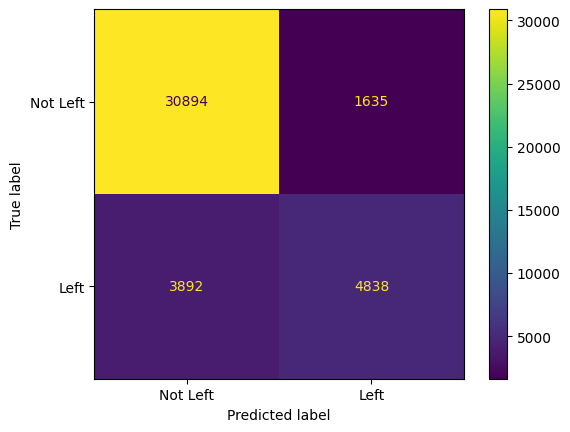

In [57]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Left','Left'])
disp.plot()
plt.show()

In [58]:
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32529
           1       0.75      0.55      0.64      8730

    accuracy                           0.87     41259
   macro avg       0.82      0.75      0.78     41259
weighted avg       0.86      0.87      0.86     41259



In [59]:
imp_df=pd.DataFrame({
    "Feature Name":X_train.columns,
    "Importance":xgb_v2.feature_importances_
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi.head(10)

Feature Name  Importance
15     NumOfProducts_2    0.620301
14     NumOfProducts_1    0.086553
1                  Age    0.083310
10  IsActiveMember_0.0    0.071527
6    Geography_Germany    0.059186
8        Gender_Female    0.025134
3              Balance    0.019319
16     NumOfProducts_3    0.009557
12       HasCrCard_0.0    0.005363
0          CreditScore    0.003850

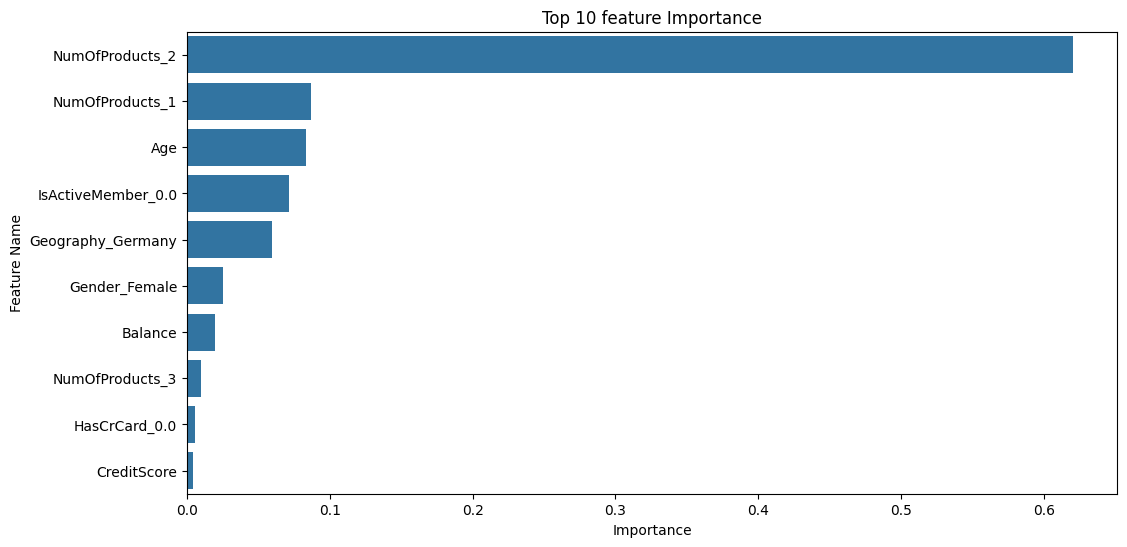

In [60]:
fi_2=fi.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=fi_2,x='Importance',y='Feature Name')
plt.title('Top 10 feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

## **Submision**

In [62]:
# sample_submission.head()
submission = sample_submision.drop(['Exited'], axis=1)
submission.head()

id
0  165034
1  165035
2  165036
3  165037
4  165038

In [63]:
X_test_encoded.head()

CreditScore   Age  Tenure    Balance  EstimatedSalary  Geography_France  \
0          586  23.0       2       0.00        160976.75                 1   
1          683  46.0       2       0.00         72549.27                 1   
2          656  34.0       7       0.00        138882.09                 1   
3          681  36.0       8       0.00        113931.57                 1   
4          752  38.0      10  121263.62        139431.00                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  \
0                  0                0              1            0   
1                  0                0              1            0   
2                  0                0              1            0   
3                  0                0              0            1   
4                  1                0              0            1   

   IsActiveMember_0.0  IsActiveMember_1.0  HasCrCard_0.0  HasCrCard_1.0  \
0                   0                   1              1              0   
1                   1                   0              0              1   
2                   1                   0              0              1   
3                   1                   0              0              1   
4                   1                   0              0              1   

   NumOfProducts_1  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  
0                0                1                0                0  
1                1                0                0                0  
2                0                1                0                0  
3                1                0                0                0  
4                1                0                0                0

### **Guardar el Modelo**

In [78]:
# Guardar el modelo en un archivo
joblib.dump(xgb_v2, 'modelo_rf.joblib')

['modelo_rf.joblib']

In [80]:
# Cargar el modelo desde el archivo
loaded_model = joblib.load('modelo_rf.joblib')

# Utilizar el modelo cargado para hacer predicciones
predictions = loaded_model.predict_proba(X_test_encoded)[:, 1]
predictions

array([0.02942935, 0.8326841 , 0.02853032, ..., 0.01723115, 0.15396291,
       0.16557635], dtype=float32)

In [81]:
submission['Exited'] = predictions
submission.sample(20)

id    Exited
28517   193551  0.011425
17967   183001  0.336542
676     165710  0.246255
86334   251368  0.012103
17102   182136  0.503084
98836   263870  0.078946
1301    166335  0.049913
57873   222907  0.162484
98303   263337  0.277094
92667   257701  0.100922
61394   226428  0.225356
70636   235670  0.140002
72861   237895  0.103048
53507   218541  0.245961
71540   236574  0.407450
78200   243234  0.921793
109798  274832  0.030018
14463   179497  0.845738
45688   210722  0.234481
35041   200075  0.671608